## Historical Volatility
La volatilidad es sinónimo de desviación estándar anualizada de los precios, o simplemente dispersión anual de los precios. Ojo, la volatilidad solo mide variación pero no dirección.
A continuación se analizará la intensidad de los cambios en el precio de cierre durante los útltimos 10 años del SPY.

In [1]:
# paquetes indispensables
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# obteniendo la data del SPY
data = pdr.get_data_yahoo('SPY', period='10y')

# obteniendo los retornos logarítmicos diarios
log_returns = np.log(data['Close']/data['Close'].shift()).dropna()
log_returns 

[*********************100%***********************]  1 of 1 completed


Date
2013-03-26 00:00:00-04:00    0.007971
2013-03-27 00:00:00-04:00    0.000000
2013-03-28 00:00:00-04:00    0.003068
2013-04-01 00:00:00-04:00   -0.003965
2013-04-02 00:00:00-04:00    0.004922
                               ...   
2023-03-20 00:00:00-04:00    0.009570
2023-03-21 00:00:00-04:00    0.013045
2023-03-22 00:00:00-04:00   -0.017193
2023-03-23 00:00:00-04:00    0.002700
2023-03-24 00:00:00-04:00    0.006541
Name: Close, Length: 2518, dtype: float64

In [3]:
# vista rápida de la estadística principal de los retornos
log_returns.describe(percentiles = [0.75, 0.90])

count    2518.000000
mean        0.000372
std         0.011108
min        -0.115887
50%         0.000582
75%         0.005570
90%         0.011549
max         0.086731
Name: Close, dtype: float64

Considerando los 10 años de data, la media del retorno logarítmico diario es de 0.0372%, la desviación estándar en este caso es de 1.1%. ¿Que quiere decir esto? que en el 68% de los casos (primera desviación estándar) el retorno diario puede fluctuar de la media un 1.1% hacia arriba o hacia abajo.

In [4]:
# la volatilidad corresponde a la desviación estándar anualizada, cada año cuenta con 252 trading days
daily_std = log_returns.std()
annualized_std =  daily_std*np.sqrt(252)
annualized_std

0.1763387629232073

#### Rolling Volatility

In [5]:
# sabiendo que la volatilidad no es estátita y que va cambiando en cada sesión de trading
volatility = log_returns.rolling(window=20).std()*np.sqrt(252)
volatility.tail()

Date
2023-03-20 00:00:00-04:00    0.185657
2023-03-21 00:00:00-04:00    0.178982
2023-03-22 00:00:00-04:00    0.189089
2023-03-23 00:00:00-04:00    0.188195
2023-03-24 00:00:00-04:00    0.186251
Name: Close, dtype: float64

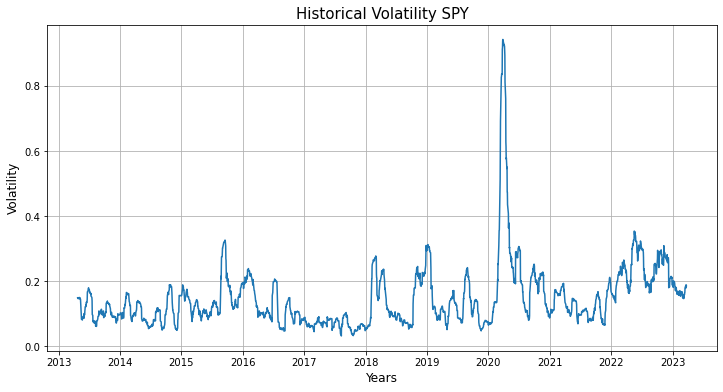

In [6]:
# plot
plt.figure(figsize=(12, 6)) # tamaño del gráfico
plt.plot(volatility)
plt.title('Historical Volatility SPY', fontsize=15) # título
plt.ylabel('Volatility', fontsize=12) # etiqueta eje y
plt.xlabel('Years', fontsize=12) # etiqueta eje x
plt.grid() # cuadrículas
plt.show()